# Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import Input
import keras


# Pre Processing Images

In [5]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting Lists into Numpy arrays

In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Train-Test Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.25,random_state=42)

In [11]:
x_train.shape

(29406, 30, 30, 3)

In [12]:
x_test.shape

(9803, 30, 30, 3)

In [13]:
y_train.shape

(29406,)

In [14]:
y_test.shape

(9803,)

# Converting the labels into one hot encoding

In [16]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building The Model

In [18]:
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))  # Proper Input layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compiling The Model

In [20]:
callback1=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history =model.fit(x=x_train,y=y_train,batch_size=32,epochs=20,verbose='auto',callbacks=[callback1],validation_data=(x_test,y_test),validation_split=0.2)
model.save("Traffic_sign_recog_model.keras")

Epoch 1/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.9461 - loss: 0.2279 - val_accuracy: 0.9849 - val_loss: 0.0586
Epoch 2/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.9598 - loss: 0.1720 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 3/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.9509 - loss: 0.2217 - val_accuracy: 0.9889 - val_loss: 0.0458
Epoch 4/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 91s 54ms/step - accuracy: 0.9536 - loss: 0.2057 - val_accuracy: 0.9763 - val_loss: 0.1052
Epoch 5/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - accuracy: 0.9448 - loss: 0.2731 - val_accuracy: 0.9869 - val_loss: 0.0532
Epoch 6/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.9526 - loss: 0.2253 - val_accuracy: 0.9903 - val_loss: 0.0368
Epoch 7/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9526 - loss: 0.2155 - val_accuracy: 0.9811 - val_loss: 0.0912
Epoch 8/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.9446 - loss: 0.2807 - 

# Plotting graphs for accuracy 

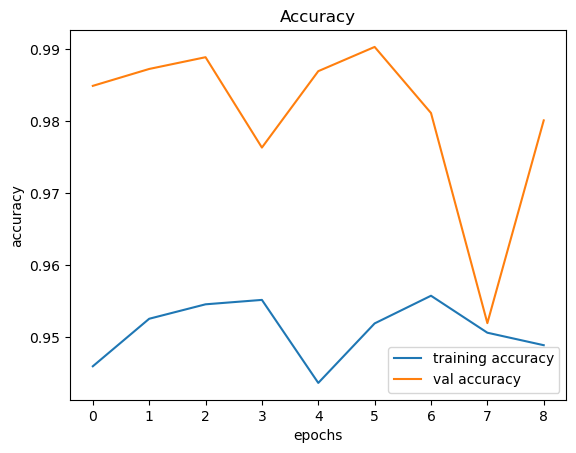

In [51]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

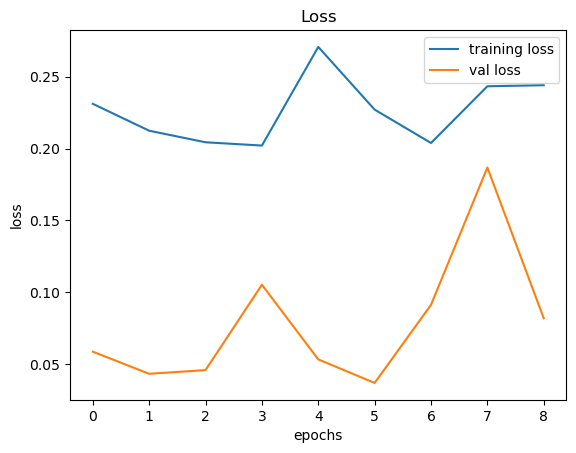

In [53]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on test dataset

In [57]:
test_df=pd.read_csv('Test.csv')

In [61]:
labels = test_df["ClassId"].values
imgs = test_df["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
x_test=np.array(data)
pred = np.argmax(model.predict(x_test), axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step


# Accuracy with the test data

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9456057007125891


# Saving The Model

In [71]:
model.save("traffic_sign_classifier.keras")